# 1 Pre-process the data

## 1.1 Load the data

In [33]:
import pandas as pd
data = pd.read_csv('training_data_fall2024.csv')

## 1.2 Cleaning the data
This includes check for missing values and handle outliers

In [34]:
"""Checking for missing values in data"""
print(f"numbers of missing data  \n{data.isnull().sum()}")
"""Nothing missed and there is no outliers"""

numbers of missing data  
hour_of_day       0
day_of_week       0
month             0
holiday           0
weekday           0
summertime        0
temp              0
dew               0
humidity          0
precip            0
snow              0
snowdepth         0
windspeed         0
cloudcover        0
visibility        0
increase_stock    0
dtype: int64


'Nothing missed and there is no outliers'

## 1.3 Show descriptive statistics


In [35]:
stats = data.drop(columns = ["increase_stock"]).describe()
print(stats)

       hour_of_day  day_of_week        month      holiday      weekday  \
count   1600.00000  1600.000000  1600.000000  1600.000000  1600.000000   
mean      11.37125     3.022500     6.468750     0.033125     0.710000   
std        6.94837     2.012965     3.454741     0.179019     0.453904   
min        0.00000     0.000000     1.000000     0.000000     0.000000   
25%        5.00000     1.000000     3.000000     0.000000     0.000000   
50%       12.00000     3.000000     6.000000     0.000000     1.000000   
75%       17.00000     5.000000     9.000000     0.000000     1.000000   
max       23.00000     6.000000    12.000000     1.000000     1.000000   

       summertime         temp          dew     humidity       precip    snow  \
count  1600.00000  1600.000000  1600.000000  1600.000000  1600.000000  1600.0   
mean      0.64375    15.210313     7.750750    63.927844     0.122042     0.0   
std       0.47904     9.264785    10.026459    19.079419     0.920600     0.0   
min      

In [36]:
"""When P > 0.05 we can say that the specific distribution of our data is a normal distribution"""
from scipy.stats import shapiro, probplot, normaltest, kstest
from matplotlib import pyplot as plt

# A function
def normality_analysis(column_name):
    
    # Pearson test
    stat_dagostino, p_dagostino = normaltest(data[column_name])
    
    # Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro(data[column_name])
    
    # Kolmogorov-Smirnov test
    stat_ks, p_ks = kstest(data[column_name], 'norm')
    
    # Saving results:
    results = pd.DataFrame({
        "Test": ["Shapiro-Wilk", "D'Agostino and Pearson", "Kolmogorov-Smirnov"],
        "Statistic": [stat_shapiro, stat_dagostino, stat_ks],
        "P-Value": [p_shapiro, p_dagostino, p_ks]
    })
    
    # Print the table in console
    print(f"Normality Test Results for {column_name}")
    print(results)

    # Plot histogram and Q-Q plot using matplotlib
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data[column_name], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    probplot(data[column_name], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {column_name}")

    plt.tight_layout()
    plt.show()

Normality Test Results for temp
                     Test   Statistic       P-Value
0            Shapiro-Wilk    0.977121  2.760607e-15
1  D'Agostino and Pearson  270.272027  2.047270e-59
2      Kolmogorov-Smirnov    0.904714  0.000000e+00


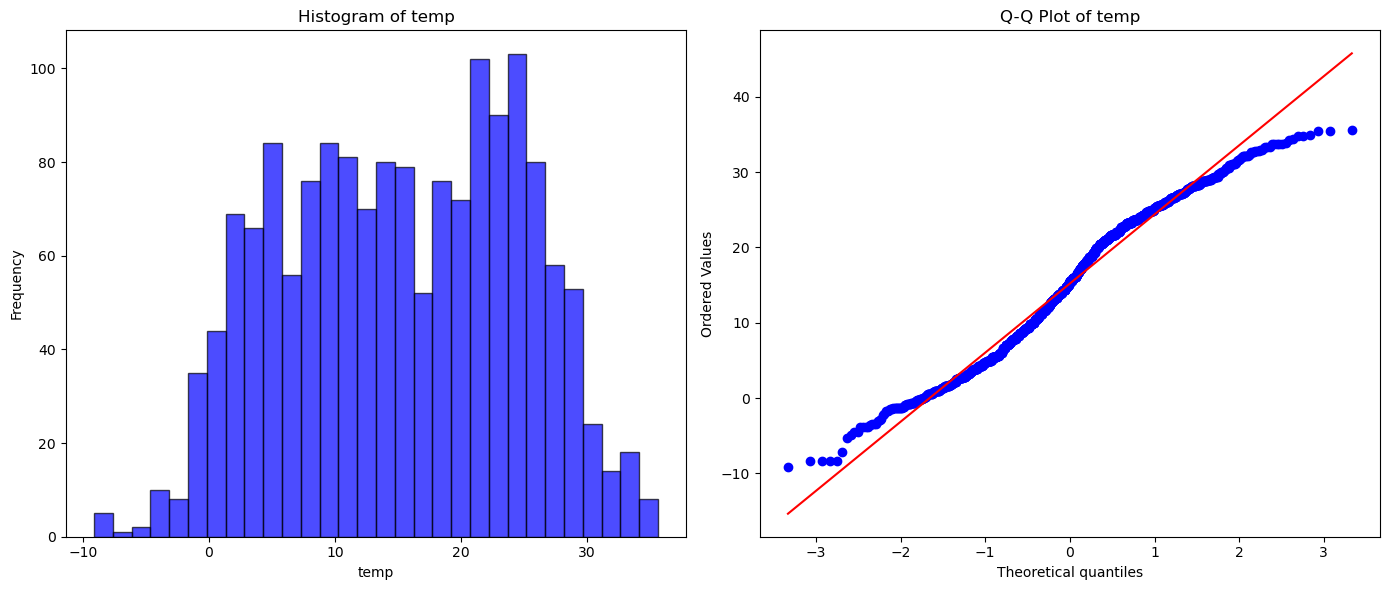

In [37]:
normality_analysis('temp')

Normality Test Results for dew
                     Test   Statistic       P-Value
0            Shapiro-Wilk    0.960420  1.839337e-20
1  D'Agostino and Pearson  362.757180  1.691528e-79
2      Kolmogorov-Smirnov    0.656195  0.000000e+00


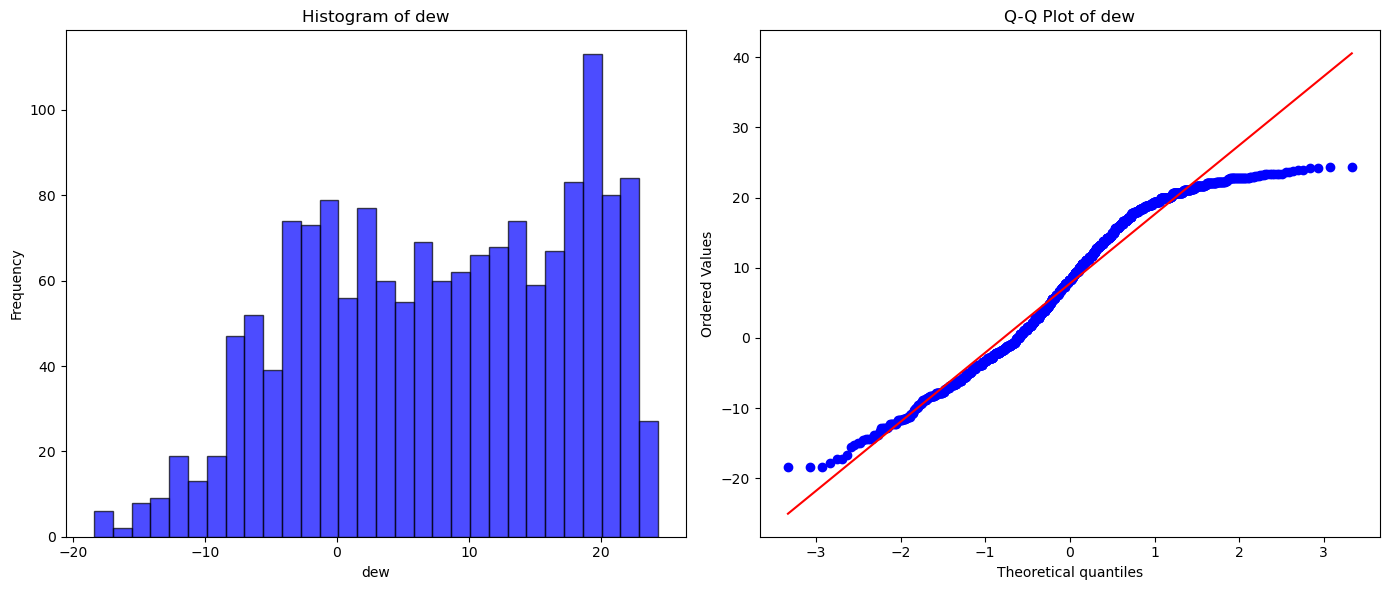

In [38]:
normality_analysis('dew')

Normality Test Results for humidity
                     Test   Statistic       P-Value
0            Shapiro-Wilk    0.969090  5.023635e-18
1  D'Agostino and Pearson  298.439252  1.565813e-65
2      Kolmogorov-Smirnov    1.000000  0.000000e+00


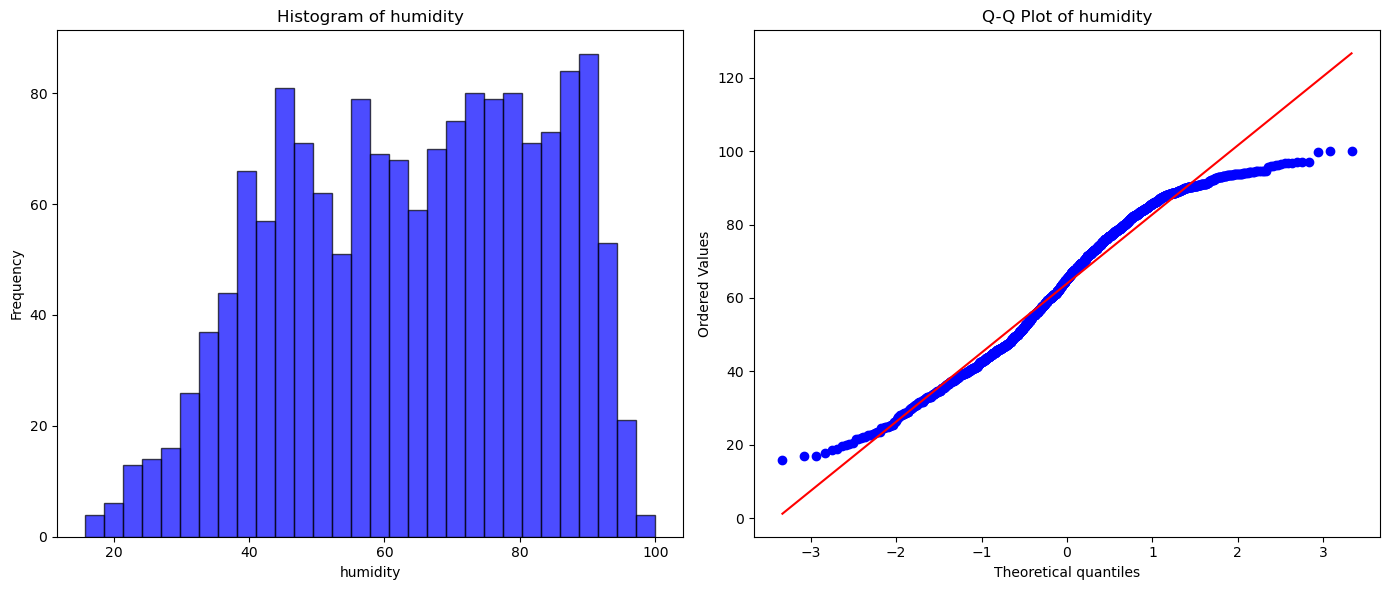

In [39]:
normality_analysis('humidity')

Normality Test Results for windspeed
                     Test   Statistic       P-Value
0            Shapiro-Wilk    0.967346  1.494994e-18
1  D'Agostino and Pearson  101.194680  1.061340e-22
2      Kolmogorov-Smirnov    0.917499  0.000000e+00


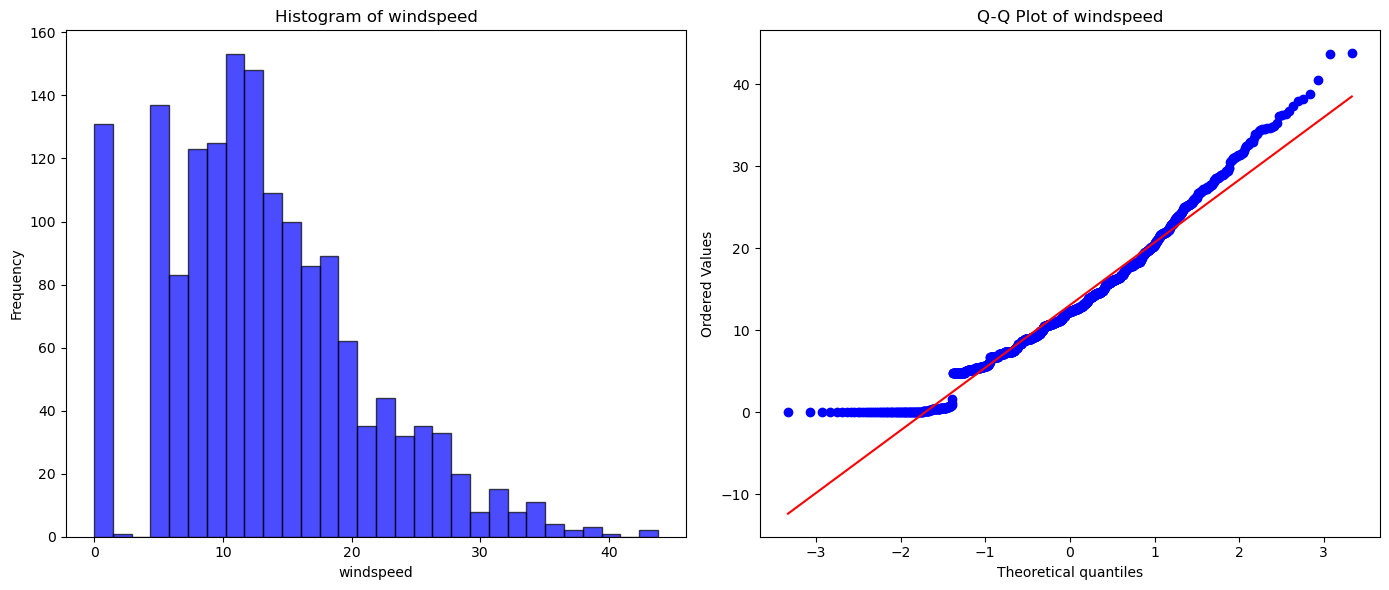

In [40]:
normality_analysis('windspeed')

Normality Test Results for cloudcover
                     Test   Statistic        P-Value
0            Shapiro-Wilk    0.865706   5.866732e-35
1  D'Agostino and Pearson  667.260576  1.277047e-145
2      Kolmogorov-Smirnov    0.922500   0.000000e+00


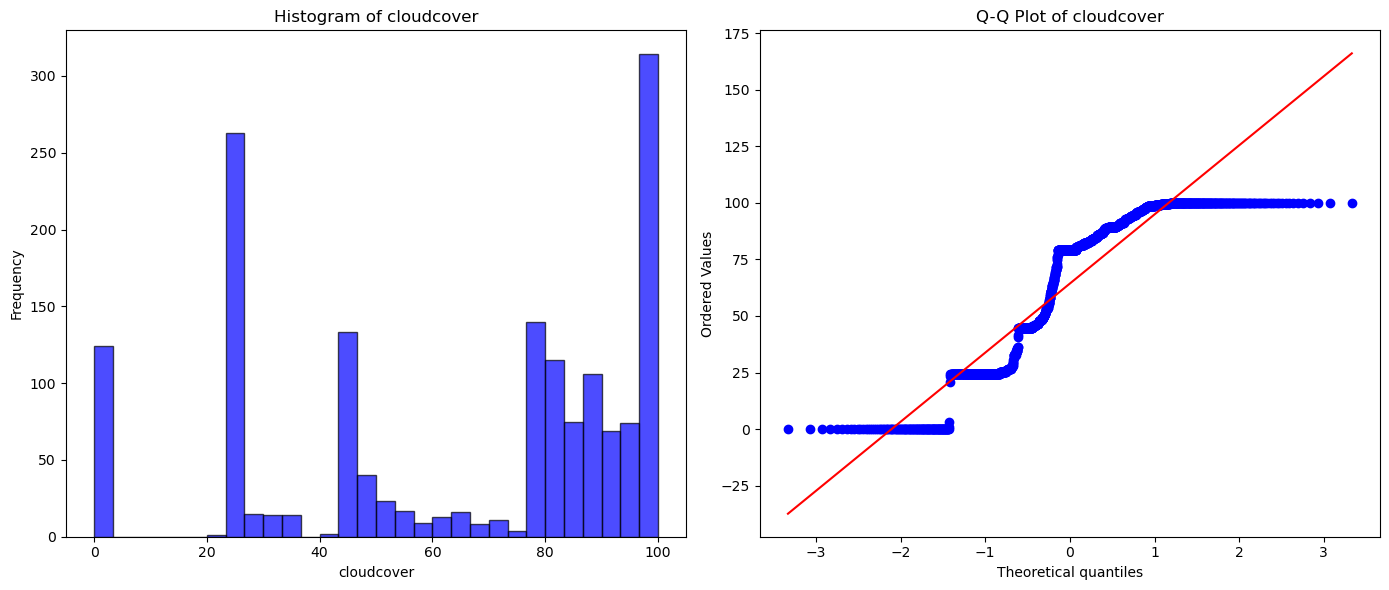

In [41]:
normality_analysis('cloudcover')

Normality Test Results for visibility
                     Test    Statistic        P-Value
0            Shapiro-Wilk     0.316106   1.214944e-60
1  D'Agostino and Pearson  1352.441155  2.094762e-294
2      Kolmogorov-Smirnov     0.992157   0.000000e+00


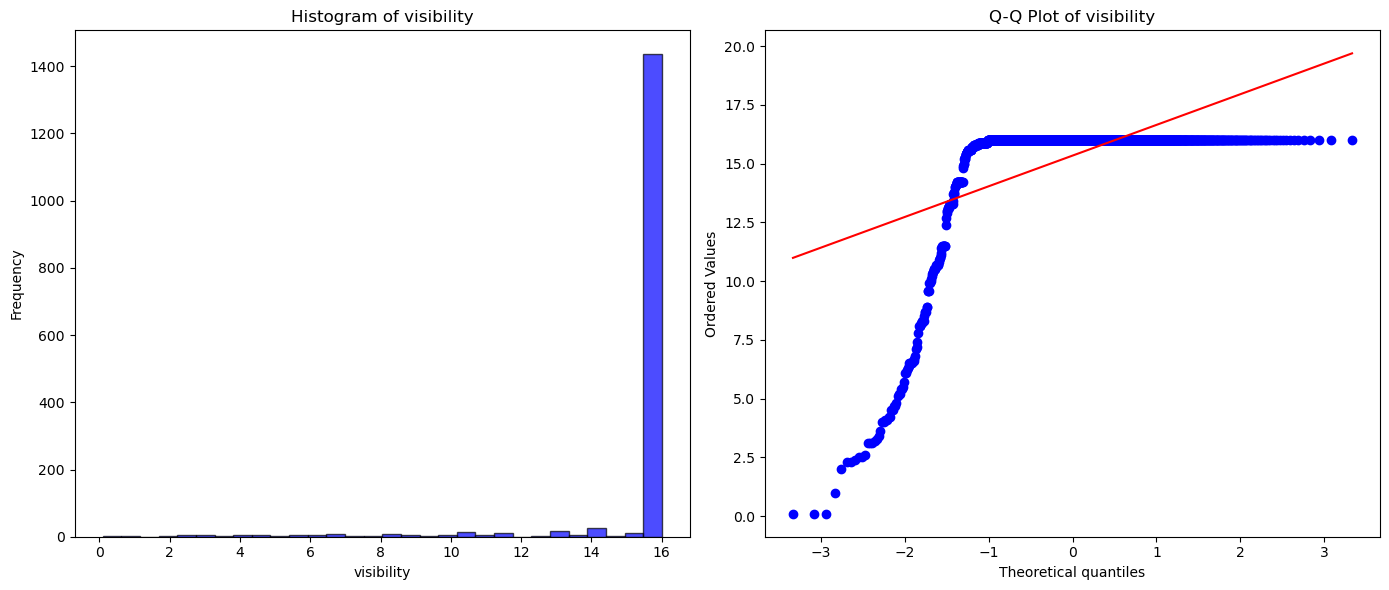

In [42]:
normality_analysis('visibility')

## Analysis:
It can be seen that all the distributions are not a normal distribution. The logistic regression, LDA and QDA are
sensitive to this.

# 2 Correlation Analysis
## 2.1 
As mentioned above, all the distributions are nor a normal distribution, so we have to choose the method of testing the significance of a correlation carefully. (这里可能不需要这么专业的说明，因为这个数据集是简单而且人造的，故目前依旧使用Spearman检验，以产生的热图为依据，指导数据降维工作)

Source: Bishara AJ, Hittner JB. Testing the significance of a correlation with nonnormal data: comparison of Pearson, Spearman, transformation, and resampling approaches. Psychol Methods. 2012 Sep;17(3):399-417. doi: 10.1037/a0028087. Epub 2012 May 7. PMID: 22563845.

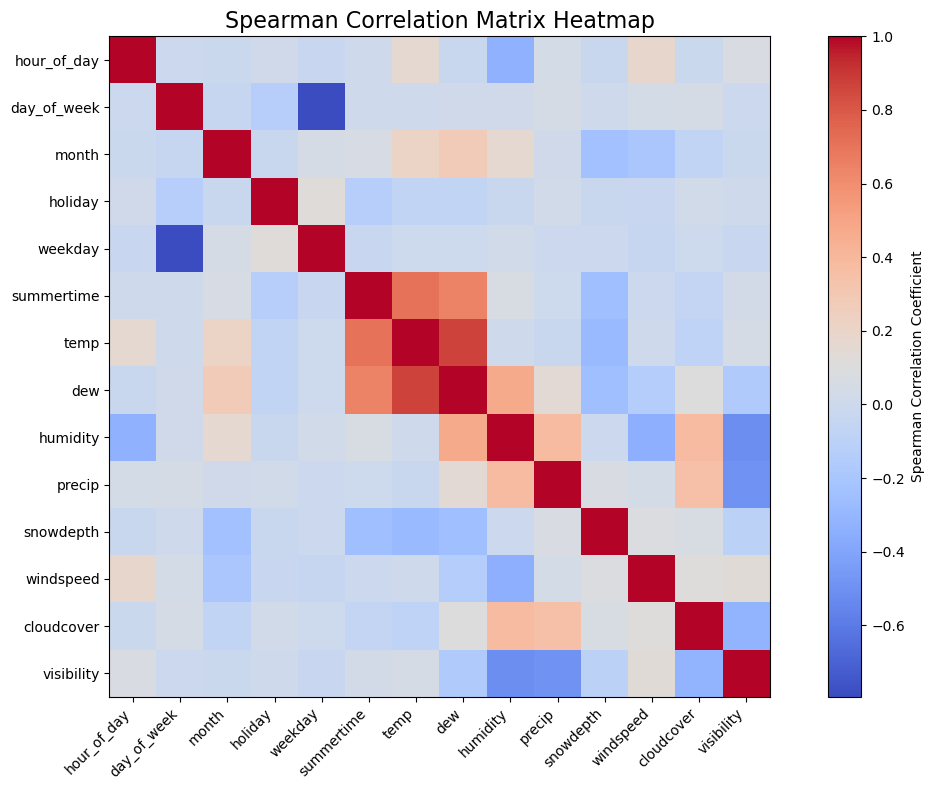

high_spearman_corr_df = 
     Feature 1 Feature 2  Correlation
0  day_of_week   weekday    -0.794134
1   summertime      temp     0.707876
2         temp       dew     0.873143


In [43]:
from scipy.stats import spearmanr
numeric_data = data.select_dtypes(include=['float64', 'int64'])
"""Drop the snow cause of all values are 0"""
numeric_data = numeric_data.drop(columns=['snow'])

"""Calculate the P_values"""
def p_analysis(data):
    def p_test(data):
        columns = data.columns
        spearman_matrix = pd.DataFrame(index=columns, columns=columns)
        p_value_matrix = pd.DataFrame(index=columns, columns=columns)
        for col1 in columns:
            for col2 in columns:
                if col1 != col2:
                    corr, p_value = spearmanr(data[col1], data[col2])
                    spearman_matrix.loc[col1, col2] = corr
                    p_value_matrix.loc[col1, col2] = p_value
                else:
                    spearman_matrix.loc[col1, col2] = 1
                    p_value_matrix.loc[col1, col2] = 0  
        return spearman_matrix.astype(float), p_value_matrix.astype(float)
    spearman_correlation_matrix, spearman_p_value_matrix = p_test(data)
    plt.figure(figsize=(12, 8))
    plt.imshow(spearman_correlation_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar(label='Spearman Correlation Coefficient')
    plt.xticks(range(len(spearman_correlation_matrix.columns)), spearman_correlation_matrix.columns, rotation=45, ha='right')
    plt.yticks(range(len(spearman_correlation_matrix.columns)), spearman_correlation_matrix.columns)
    plt.title('Spearman Correlation Matrix Heatmap', fontsize=16)
    plt.tight_layout()
    plt.show()
    # Maybe we can consider that when threshold > 0.7 means two parameters are highly correlated
    threshold = 0.7
    high_spearman_corr_pairs = [
        (spearman_correlation_matrix.index[i], spearman_correlation_matrix.columns[j], spearman_correlation_matrix.iloc[i, j])
        for i in range(len(spearman_correlation_matrix.columns)) 
        for j in range(i + 1, len(spearman_correlation_matrix.columns)) 
        if abs(spearman_correlation_matrix.iloc[i, j]) > threshold and spearman_p_value_matrix.iloc[i, j] < 0.05
    ]
    
    high_spearman_corr_df = pd.DataFrame(high_spearman_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
    print(f"high_spearman_corr_df = \n{high_spearman_corr_df}")
    
p_analysis(numeric_data)


## Analysis:
There are three strongly correlated features like temp, dew and summertime; maybe we could remove two of them. This maybe useful for Logistic regression. Or, using PCA selection for a more robust approach.

# 3 Scaling
Here, Scaling is highly required for three methods: logistic regression, LDA, QDA but is recommend for Boosting method. Tree-based method does not need any scaling. Hence we could use standardization for these methods.
Source about this part https://www.geeksforgeeks.org/normalization-vs-standardization/

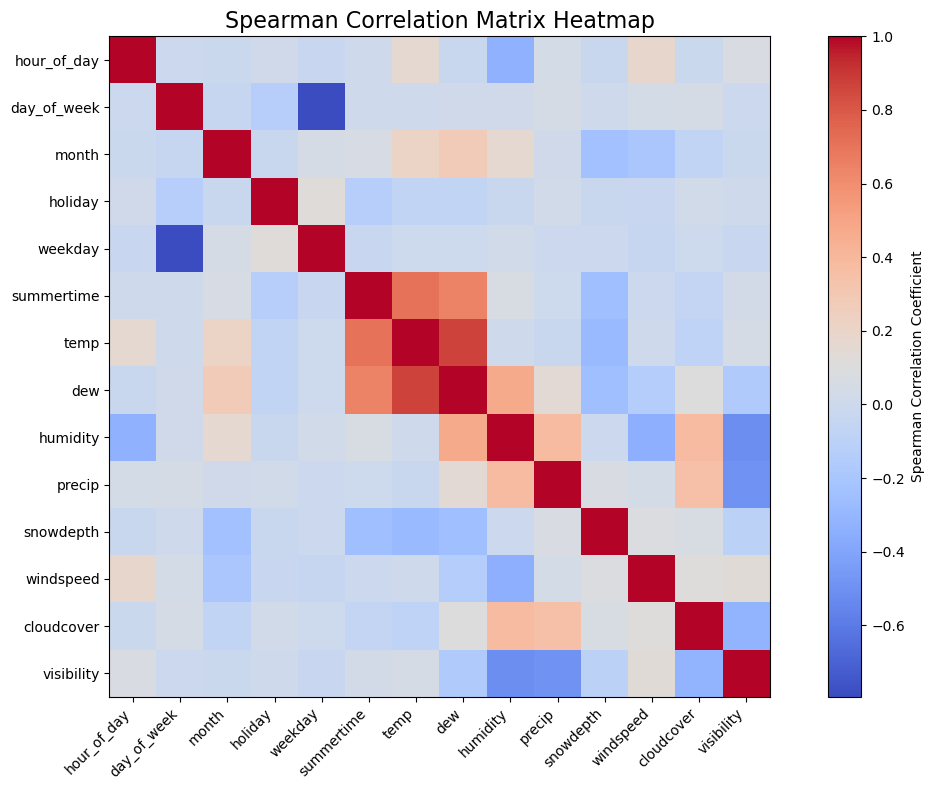

high_spearman_corr_df = 
     Feature 1 Feature 2  Correlation
0  day_of_week   weekday    -0.794134
1   summertime      temp     0.707876
2         temp       dew     0.873143


In [44]:
# use numeric_data defined above
from sklearn.preprocessing import StandardScaler
data_standardized = pd.DataFrame(StandardScaler().fit_transform(numeric_data), 
                                 columns=numeric_data.columns,
                                 index=numeric_data.index)
p_analysis(data_standardized) # Here nothing changed
# Drop the dew and summertime
data_standardized = data_standardized.drop(columns=['dew', 'summertime'])
scaler_standard = StandardScaler()
data_scaled = scaler_standard.fit_transform(numeric_data)

# 4 Dimensionality Reduction
Using PCA, we keep the first nine components

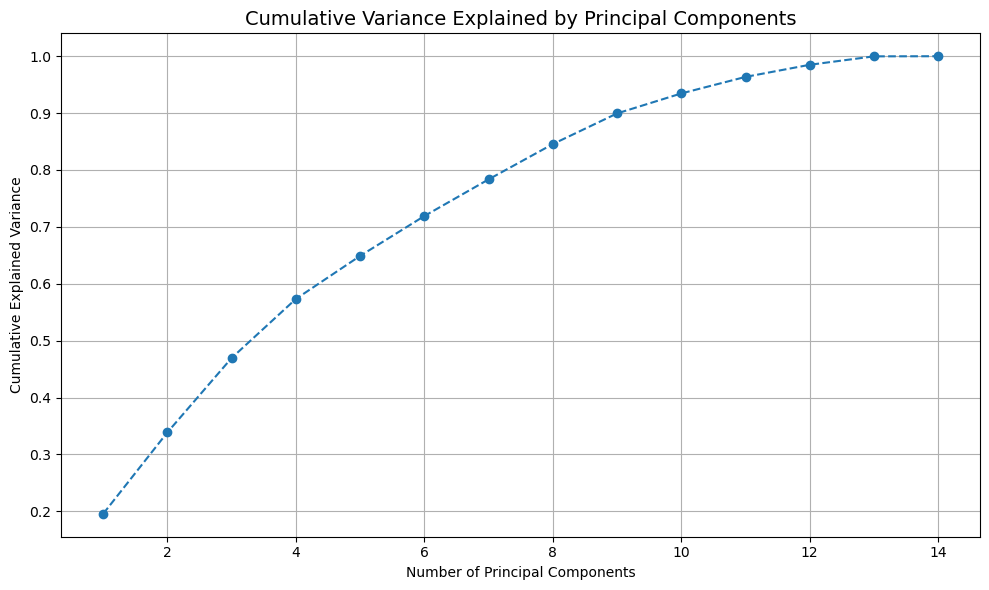

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,3.771196,-0.191786,1.870342,-0.992253,-0.397871,0.355058,-1.205560,0.533896,-0.197430
1,3.606744,-0.458260,0.209581,1.463341,0.052991,-0.335547,-0.348490,-1.256733,-0.448464
2,-2.330487,-0.218098,-0.580391,-0.074858,0.404098,-0.326549,1.002580,-0.582373,-1.440699
3,2.584495,-0.577493,2.089358,-1.105226,-0.576341,0.590052,-1.396201,1.387883,0.279834
4,2.807862,-1.227993,-1.595063,0.508223,0.503872,0.596322,-0.243630,-0.228830,-1.142311
...,...,...,...,...,...,...,...,...,...
1595,-1.695506,-0.275406,1.619864,-1.250819,-0.628011,0.231370,-0.505977,1.271407,0.160926
1596,-2.075203,2.538098,-0.915443,1.731792,0.868157,0.762640,-0.520878,0.063033,-0.729397
1597,1.708756,-0.127443,-1.301954,2.470449,-2.754387,0.580383,2.218480,1.759341,-0.156156
1598,1.571301,-2.087964,1.470920,-0.215351,0.443702,0.589278,-0.604568,1.076764,-1.394180


In [45]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca_components = pca.fit_transform(data_scaled)

# Create a DataFrame for PCA results to calculate how many components we need to keep
pca_df = pd.DataFrame(
    data=pca_components,
    index=numeric_data.index,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Variance Explained by Principal Components", fontsize=14)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.tight_layout()
plt.show()

"""select the first nine components"""
selected_pcs = pca_df.iloc[:, :9]
selected_pcs

# 5 Training demo, and find problems


In [46]:
from sklearn.model_selection import train_test_split
mapping = {'high_bike_demand': 1, 'low_bike_demand': 0}
y = data['increase_stock'].replace(mapping).to_numpy().reshape(-1, 1)
X_pca = pca_df.iloc[:, :9].to_numpy()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)


logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_pca, y_train_pca.ravel())


y_pred_pca_logistic = logistic_model.predict(X_test_pca)


accuracy_logistic = accuracy_score(y_test_pca, y_pred_pca_logistic)
report_logistic = classification_report(y_test_pca, y_pred_pca_logistic)

print(f"Test Accuracy with Logistic Regression on PCA-Reduced Features: {accuracy_logistic:.2f}")
print("\nClassification Report:\n", report_logistic)

Test Accuracy with Logistic Regression on PCA-Reduced Features: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       270
           1       0.45      0.38      0.41        50

    accuracy                           0.83       320
   macro avg       0.67      0.65      0.66       320
weighted avg       0.82      0.83      0.83       320



C:\Users\BoyNextDoor\AppData\Local\Temp\ipykernel_41100\1984879977.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = data['increase_stock'].replace(mapping).to_numpy().reshape(-1, 1)


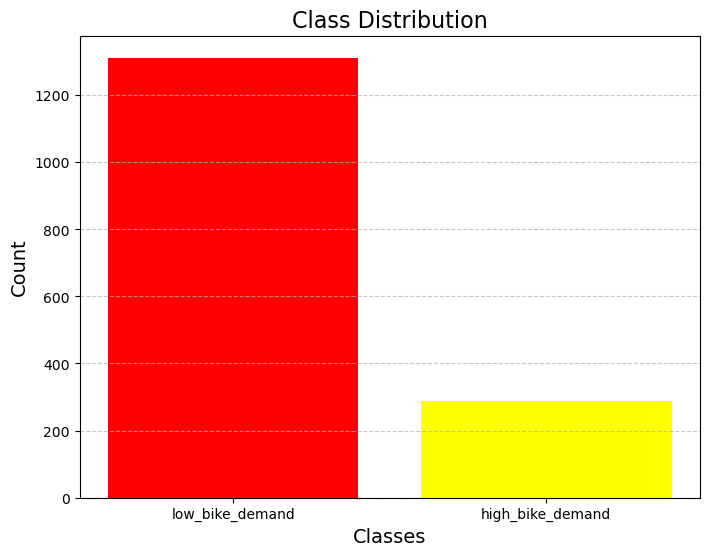

Proportion of low_bike_demand: 82.00%
Proportion of high_bike_demand: 18.00%


In [47]:
"""
 If the dataframes has imbalanced classes, then In such cases, you get a pretty high accuracy just by predicting the majority class, but you fail to capture the minority class, which is most often the point of creating the model in the first place.
"""
# Count the occurrences of each class in the target variable (y)
class_counts = np.bincount(y.ravel())
class_labels = ['low_bike_demand', 'high_bike_demand']

# Plotting the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color=['red', 'yellow'])
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate the proportion of each class
total_samples = len(y)
class_proportions = [count / total_samples for count in class_counts]

# Display the class proportions
for label, proportion in zip(class_labels, class_proportions):
    print(f"Proportion of {label}: {proportion:.2%}")


In [48]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Use RandomUnderSampler to address class imbalance
rus = RandomUnderSampler(random_state=42, replacement=True)
X_rus, y_rus = rus.fit_resample(X_pca, y)

# Check the new class distribution after resampling
print('Original dataset shape:', Counter(y.ravel()))
print('Resampled dataset shape:', Counter(y_rus.ravel()))

# Split resampled data into training and testing sets (80% train, 20% test)
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)

# Train Logistic Regression model on resampled data
logistic_model_rus = LogisticRegression(max_iter=1000, random_state=42)
logistic_model_rus.fit(X_train_rus, y_train_rus.ravel())

# Predict on the test set
y_pred_rus = logistic_model_rus.predict(X_test_rus)

# Model evaluation
accuracy_rus = accuracy_score(y_test_rus, y_pred_rus)
report_rus = classification_report(y_test_rus, y_pred_rus)

print(f"Test Accuracy with Logistic Regression on Resampled Data: {accuracy_rus:.2f}")
print("\nClassification Report after Resampling:\n", report_rus)

Original dataset shape: Counter({0: 1312, 1: 288})
Resampled dataset shape: Counter({0: 288, 1: 288})
Test Accuracy with Logistic Regression on Resampled Data: 0.84

Classification Report after Resampling:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        63
           1       0.80      0.85      0.83        53

    accuracy                           0.84       116
   macro avg       0.84      0.84      0.84       116
weighted avg       0.84      0.84      0.84       116



In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.metrics import accuracy_score

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create a dictionary to store the models and their results
model_results = {}

# 1. Discriminant Analysis (LDA, QDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train_pca.ravel())
y_pred_lda = lda.predict(X_test_pca)
model_results['LDA'] = classification_report(y_test_pca, y_pred_lda)
model_results['LDA Accuracy'] = accuracy_score(y_test_pca, y_pred_lda)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_pca, y_train_pca.ravel())
y_pred_qda = qda.predict(X_test_pca)
model_results['QDA'] = classification_report(y_test_pca, y_pred_qda)
model_results['QDA Accuracy'] = accuracy_score(y_test_pca, y_pred_qda)

# 2. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train_pca.ravel())
y_pred_knn = knn.predict(X_test_pca)
model_results['KNN'] = classification_report(y_test_pca, y_pred_knn)
model_results['KNN Accuracy'] = accuracy_score(y_test_pca, y_pred_knn)

# 3. Tree-Based Methods (Decision Tree, Random Forest, Bagging)
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_pca, y_train_pca.ravel())
y_pred_tree = decision_tree.predict(X_test_pca)
model_results['Decision Tree'] = classification_report(y_test_pca, y_pred_tree)
model_results['Decision Tree Accuracy'] = accuracy_score(y_test_pca, y_pred_tree)

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_pca, y_train_pca.ravel())
y_pred_rf = random_forest.predict(X_test_pca)
model_results['Random Forest'] = classification_report(y_test_pca, y_pred_rf)
model_results['Random Forest Accuracy'] = accuracy_score(y_test_pca, y_pred_rf)

# Bagging Classifier (using Decision Tree as base estimator)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train_pca, y_train_pca.ravel())
y_pred_bagging = bagging.predict(X_test_pca)
model_results['Bagging'] = classification_report(y_test_pca, y_pred_bagging)
model_results['Bagging Accuracy'] = accuracy_score(y_test_pca, y_pred_bagging)

# 4. Boosting Methods (AdaBoost, Gradient Boosting)
# AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train_pca, y_train_pca.ravel())
y_pred_adaboost = adaboost.predict(X_test_pca)
model_results['AdaBoost'] = classification_report(y_test_pca, y_pred_adaboost)
model_results['AdaBoost Accuracy'] = accuracy_score(y_test_pca, y_pred_adaboost)

# Gradient Boosting Classifier
gradient_boost = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boost.fit(X_train_pca, y_train_pca.ravel())
y_pred_gb = gradient_boost.predict(X_test_pca)
model_results['Gradient Boosting'] = classification_report(y_test_pca, y_pred_gb)
model_results['Gradient Boosting Accuracy'] = accuracy_score(y_test_pca, y_pred_gb)

# Print the results for each model
for model_name, report in model_results.items():
    if 'Accuracy' in model_name:
        print(f"{model_name}: {report:.2f}")
    else:
        print(f"Classification Report for {model_name}:\n")
        print(report)
        print("-" * 60)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report for LDA:

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       270
           1       0.38      0.28      0.32        50

    accuracy                           0.82       320
   macro avg       0.63      0.60      0.61       320
weighted avg       0.80      0.82      0.80       320

------------------------------------------------------------
LDA Accuracy: 0.82
Classification Report for QDA:

              precision    recall  f1-score   support

           0       0.94      0.61      0.74       270
           1       0.27      0.78      0.40        50

    accuracy                           0.63       320
   macro avg       0.60      0.69      0.57       320
weighted avg       0.83      0.63      0.68       320

------------------------------------------------------------
QDA Accuracy: 0.63
Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.90      0.89  

In [50]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)

# Create a dictionary to store the models and their results
model_results = {}

# 1. Discriminant Analysis (LDA, QDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train_pca.ravel())
y_pred_lda = lda.predict(X_test_pca)
model_results['LDA'] = classification_report(y_test_pca, y_pred_lda)
model_results['LDA Accuracy'] = accuracy_score(y_test_pca, y_pred_lda)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_pca, y_train_pca.ravel())
y_pred_qda = qda.predict(X_test_pca)
model_results['QDA'] = classification_report(y_test_pca, y_pred_qda)
model_results['QDA Accuracy'] = accuracy_score(y_test_pca, y_pred_qda)

# 2. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train_pca.ravel())
y_pred_knn = knn.predict(X_test_pca)
model_results['KNN'] = classification_report(y_test_pca, y_pred_knn)
model_results['KNN Accuracy'] = accuracy_score(y_test_pca, y_pred_knn)

# 3. Tree-Based Methods (Decision Tree, Random Forest, Bagging)
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_pca, y_train_pca.ravel())
y_pred_tree = decision_tree.predict(X_test_pca)
model_results['Decision Tree'] = classification_report(y_test_pca, y_pred_tree)
model_results['Decision Tree Accuracy'] = accuracy_score(y_test_pca, y_pred_tree)

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_pca, y_train_pca.ravel())
y_pred_rf = random_forest.predict(X_test_pca)
model_results['Random Forest'] = classification_report(y_test_pca, y_pred_rf)
model_results['Random Forest Accuracy'] = accuracy_score(y_test_pca, y_pred_rf)

# Bagging Classifier (using Decision Tree as base estimator)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train_pca, y_train_pca.ravel())
y_pred_bagging = bagging.predict(X_test_pca)
model_results['Bagging'] = classification_report(y_test_pca, y_pred_bagging)
model_results['Bagging Accuracy'] = accuracy_score(y_test_pca, y_pred_bagging)

# 4. Boosting Methods (AdaBoost, Gradient Boosting)
# AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train_pca, y_train_pca.ravel())
y_pred_adaboost = adaboost.predict(X_test_pca)
model_results['AdaBoost'] = classification_report(y_test_pca, y_pred_adaboost)
model_results['AdaBoost Accuracy'] = accuracy_score(y_test_pca, y_pred_adaboost)

# Gradient Boosting Classifier
gradient_boost = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boost.fit(X_train_pca, y_train_pca.ravel())
y_pred_gb = gradient_boost.predict(X_test_pca)
model_results['Gradient Boosting'] = classification_report(y_test_pca, y_pred_gb)
model_results['Gradient Boosting Accuracy'] = accuracy_score(y_test_pca, y_pred_gb)

# Print the results for each model
for model_name, report in model_results.items():
    if 'Accuracy' in model_name:
        print(f"{model_name}: {report:.2f}")
    else:
        print(f"Classification Report for {model_name}:\n")
        print(report)
        print("-" * 60)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report for LDA:

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        63
           1       0.75      0.83      0.79        53

    accuracy                           0.79       116
   macro avg       0.79      0.80      0.79       116
weighted avg       0.80      0.79      0.79       116

------------------------------------------------------------
LDA Accuracy: 0.79
Classification Report for QDA:

              precision    recall  f1-score   support

           0       1.00      0.44      0.62        63
           1       0.60      1.00      0.75        53

    accuracy                           0.70       116
   macro avg       0.80      0.72      0.68       116
weighted avg       0.82      0.70      0.68       116

------------------------------------------------------------
QDA Accuracy: 0.70
Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.78      0.71  